In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
binned_personality = pd.read_csv('../personality_traits/personality/binned_personality.csv')
personality_sex_age = pd.read_csv('../personality_traits/personality/personality_sex_age.csv')

In [3]:
binned_personality.head()

participant  Neuroticism  Extraversion  Openness  Agreeableness  \
0            1          3.0           2.0       3.0            1.0   
1            4          1.0           1.0       2.0            2.0   
2            5          3.0           3.0       3.0            3.0   
3            6          3.0           2.0       3.0            2.0   
4            7          1.0           1.0       2.0            2.0   

   Conscientiousness  
0                3.0  
1                1.0  
2                1.0  
3                1.0  
4                2.0

In [4]:
personality_sex_age.head()

participant  Sex  Age  Neuroticism  Extraversion  Openness  Agreeableness  \
0            0    1    1          1.0           1.0       1.0            1.0   
1            1    1   22          5.5           3.0       6.0            3.5   
2            2    1    1          1.0           1.0       1.0            1.0   
3            3    1    1          1.0           1.0       1.0            1.0   
4            4    1   25          2.5           2.0       4.5            4.5   

   Conscientiousness  Perceptual Curiosity Scale  \
0                1.0                         1.0   
1                6.0                         5.5   
2                1.0                         1.0   
3                1.0                         1.0   
4                2.5                         2.5   

   Curiosity and Exploration Inventory  
0                                  1.0  
1                                  3.0  
2                                  1.0  
3                                  1.0  
4                                  2.0

In [16]:
personality_sex_age = personality_sex_age.loc[personality_sex_age['participant'] != 0, :]
personality_sex_age = personality_sex_age.loc[personality_sex_age['participant'] != 2, :]
personality_sex_age = personality_sex_age.loc[personality_sex_age['participant'] != 3, :]
personality_sex_age = personality_sex_age.loc[personality_sex_age['participant'] != 28, :]
personality_sex_age.drop(['Perceptual Curiosity Scale', 'Curiosity and Exploration Inventory'], axis=1, inplace=True)

In [7]:
# personality_sex_age.csvには000, 002, 003, 028が存在するが、分析では除外されている

In [5]:
binned_personality.describe()

participant  Neuroticism  Extraversion   Openness  Agreeableness  \
count    73.000000    73.000000     73.000000  73.000000      73.000000   
mean     39.630137     2.027397      1.972603   1.931507       2.013699   
std      21.659939     0.781249      0.725959   0.751457       0.790449   
min       1.000000     1.000000      1.000000   1.000000       1.000000   
25%      21.000000     1.000000      1.000000   1.000000       1.000000   
50%      40.000000     2.000000      2.000000   2.000000       2.000000   
75%      58.000000     3.000000      2.000000   2.000000       3.000000   
max      76.000000     3.000000      3.000000   3.000000       3.000000   

       Conscientiousness  
count          73.000000  
mean            2.013699  
std             0.807829  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max             3.000000

In [99]:
personality_sex_age.describe()

participant        Sex        Age  Neuroticism  Extraversion  \
count    73.000000  73.000000  73.000000    73.000000     73.000000   
mean     39.630137   1.356164  21.424658     4.061644      3.980822   
std      21.659939   0.482179   2.133840     1.409160      1.484799   
min       1.000000   1.000000  18.000000     1.500000      1.500000   
25%      21.000000   1.000000  20.000000     3.000000      2.500000   
50%      40.000000   1.000000  21.000000     4.000000      4.000000   
75%      58.000000   2.000000  23.000000     5.000000      5.000000   
max      76.000000   2.000000  28.000000     6.500000      7.000000   

        Openness  Agreeableness  Conscientiousness  
count  73.000000      73.000000          73.000000  
mean    4.184932       4.958904           3.664384  
std     1.365515       1.168907           1.392078  
min     1.500000       2.000000           1.000000  
25%     3.000000       4.000000           2.500000  
50%     4.000000       5.000000           3.500000  
75%     5.000000       6.000000           4.500000  
max     7.000000       7.000000           6.500000

In [101]:
# 各因子の相関係数
corr = personality_sex_age.drop(['participant', 'Sex', 'Age'], axis=1).corr()
corr

Neuroticism  Extraversion  Openness  Agreeableness  \
Neuroticism           1.000000     -0.223129 -0.105253      -0.289343   
Extraversion         -0.223129      1.000000  0.047327       0.011943   
Openness             -0.105253      0.047327  1.000000       0.111420   
Agreeableness        -0.289343      0.011943  0.111420       1.000000   
Conscientiousness    -0.146841      0.281413 -0.087452       0.115169   

                   Conscientiousness  
Neuroticism                -0.146841  
Extraversion                0.281413  
Openness                   -0.087452  
Agreeableness               0.115169  
Conscientiousness           1.000000

In [182]:
# correlation heatmap
sns.heatmap(corr)
plt.show()

In [18]:
for col in personality_sex_age.drop('participant', axis=1).columns:
    print('[{}]'.format(col))
    print('{}'.format(personality_sex_age[col].value_counts()))

[Sex]
1    47
2    26
Name: Sex, dtype: int64
[Age]
19    15
22    13
20    11
24     9
23     9
21     8
25     4
18     3
28     1
Name: Age, dtype: int64
[Neuroticism]
4.0    11
3.5    10
2.5     9
4.5     8
6.0     7
5.0     6
6.5     5
3.0     5
5.5     5
1.5     4
2.0     3
Name: Neuroticism, dtype: int64
[Extraversion]
2.5    10
5.0    10
3.0     9
5.5     8
6.0     7
2.0     7
4.0     6
3.5     5
4.5     5
1.5     3
6.6     1
6.5     1
7.0     1
Name: Extraversion, dtype: int64
[Openness]
3.0    11
5.0    11
4.0     8
3.5     8
2.5     8
5.5     8
6.0     6
4.5     5
7.0     3
2.0     3
6.5     1
1.5     1
Name: Openness, dtype: int64
[Agreeableness]
6.0    14
5.0    11
4.0    10
5.5     9
4.5     8
6.5     6
3.5     6
3.0     4
7.0     3
2.5     1
2.0     1
Name: Agreeableness, dtype: int64
[Conscientiousness]
4.0    12
2.5    11
3.0     9
2.0     8
4.5     7
5.0     7
3.5     5
6.0     4
6.5     3
5.5     3
1.5     2
1.0     2
Name: Conscientiousness, dtype: int64


In [171]:
# 各因子の素点のヒストグラム（分布）

fig, ax = plt.subplots(2, 3, sharey=True, figsize=(12,5))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
fig.text(0.05, 0.5, 'Frequency', rotation=90)
fig.text(0.5, 0, 'Personality Score')

ax[0,0].hist(personality_sex_age['Neuroticism'], bins=len(personality_sex_age['Neuroticism'].unique()), range=[1,7])
ax[0,0].set_xlabel('Neuroticism', fontsize=11)
ax[0,1].hist(personality_sex_age['Extraversion'], bins=len(personality_sex_age['Extraversion'].unique()), range=[1,7])
ax[0,1].set_xlabel('Extraversion', fontsize=11)
ax[0,2].hist(personality_sex_age['Openness'], bins=len(personality_sex_age['Openness'].unique()), range=[1,7])
ax[0,2].set_xlabel('Openness', fontsize=11)
ax[1,0].hist(personality_sex_age['Agreeableness'], bins=len(personality_sex_age['Agreeableness'].unique()), range=[1,7])
ax[1,0].set_xlabel('Agreeableness', fontsize=11)
ax[1,1].hist(personality_sex_age['Conscientiousness'], bins=len(personality_sex_age['Conscientiousness'].unique()), range=[1,7])
ax[1,1].set_xlabel('Conscientiousness', fontsize=11)
ax[1,2].axis('off')

plt.show()

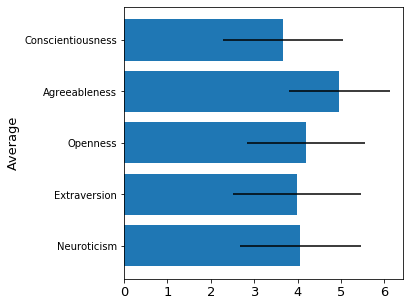

In [180]:
# 素点の平均値の棒グラフ

names = personality_sex_age.drop(['participant', 'Sex', 'Age'], axis=1).columns

average = [np.mean(personality_sex_age[c]) for c in names]
std = [np.std(personality_sex_age[c]) for c in names]

fig, ax = plt.subplots(figsize=(5, 5))

ax.barh(names, average, xerr=std, )
plt.tick_params(axis='x', which='major', labelsize=13)

plt.ylabel('Average', fontsize=13)
plt.show()

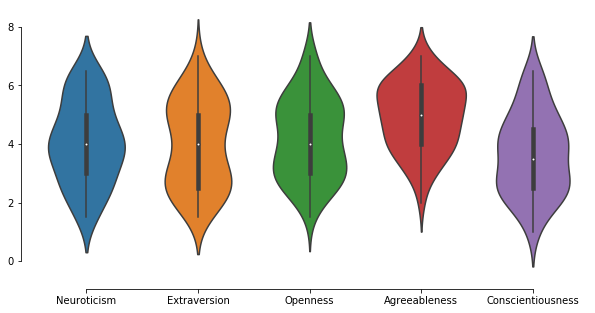

In [174]:
# violinplot
plt.figure(figsize=(10,5))

sns.violinplot(data=personality_sex_age.drop(['participant', 'Sex', 'Age'],axis=1), showmedians=True)
sns.despine(offset=10, trim=True)

N	class 1: 21 2: 29 3: 23
E	class 1: 20 2: 35 3: 18
O	class 1: 23 2: 32 3: 18
A	class 1: 22 2: 28 3: 23
C	class 1: 23 2: 26 3: 24


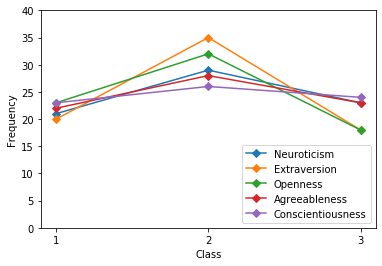

In [98]:
# number of subjects in each class
fig, ax = plt.subplots()
for i, col in enumerate(binned_personality.drop('participant', axis=1).columns):
    hist, div = np.histogram(binned_personality[col], bins=3)
    print('{}\tclass 1: {} 2: {} 3: {}'.format(col[0], hist[0], hist[1], hist[2]))
    ax.plot(np.arange(1, 4), hist, marker='D', label=col)
    ax.legend(loc='lower right')
    ax.set_xticks(np.arange(1, 4))
    ax.set_yticks(np.arange(0, 41, 5))
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Class')
plt.show()